In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [4]:
import fbprophet
from fbprophet import Prophet

In [5]:
data=pd.read_csv("Dataset.csv",parse_dates=["observation_date"])

In [6]:
data.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  12649 non-null  datetime64[ns]
 1   DEXINUS           12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


In [8]:
df=data.tail(365)

In [9]:
df

,observation_date,DEXINUS
12284,2020-02-03,71.32
12285,2020-02-04,71.11
12286,2020-02-05,71.19
12287,2020-02-06,71.19
12288,2020-02-07,71.47
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [10]:
df1=df.rename(columns={'observation_date':'ds','DEXINUS':'y'})


In [11]:
df1

,ds,y
12284,2020-02-03,71.32
12285,2020-02-04,71.11
12286,2020-02-05,71.19
12287,2020-02-06,71.19
12288,2020-02-07,71.47
...,...,...
12644,2021-06-21,74.18
12645,2021-06-22,74.37
12646,2021-06-23,74.13
12647,2021-06-24,74.14


In [12]:
m=Prophet() 

In [13]:
m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
m.params

{'k': array([[0.52632764]]),
 'm': array([[0.91920549]]),
 'delta': array([[ 1.42117290e-01,  8.86807590e-09, -2.34221500e-01,
         -4.85577464e-01, -1.48057699e-03,  1.54353786e-08,
          2.26991188e-09, -3.56975581e-07, -8.23729549e-02,
         -3.46503409e-08, -1.47468700e-06, -5.80409623e-02,
          2.57419208e-09,  1.68660903e-01,  1.10054984e-01,
          4.33531409e-08, -1.67944703e-02, -1.74537890e-01,
         -1.04406121e-07, -1.66760858e-08,  2.97918161e-06,
          7.07569829e-02,  1.47800195e-01,  1.38438551e-07,
         -9.01875700e-02]]),
 'sigma_obs': array([[0.0065912]]),
 'beta': array([[ 1.77107635e-03, -1.50772807e-03, -1.25728478e-03,
         -2.59436983e-04,  8.18951037e-05,  2.96123048e-04]]),
 'trend': array([[0.91920549, 0.92024157, 0.92127764, 0.92231372, 0.9233498 ,
         0.92645803, 0.92749411, 0.92853019, 0.92956627, 0.93060235,
         0.93474666, 0.93578274, 0.93709857, 0.93841441, 0.94236192,
         0.94367775, 0.94499359, 0.946309

In [15]:
future=m.make_future_dataframe(periods=30)

In [16]:
future

,ds
0,2020-02-03
1,2020-02-04
2,2020-02-05
3,2020-02-06
4,2020-02-07
...,...
390,2021-07-21
391,2021-07-22
392,2021-07-23
393,2021-07-24


In [17]:
forecast = m.predict(future)

In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-03,70.678959,70.022526,71.322007
1,2020-02-04,70.700681,70.054888,71.372442
2,2020-02-05,70.788927,70.102463,71.473235
3,2020-02-06,70.858844,70.250429,71.570096
4,2020-02-07,70.978305,70.351369,71.624427
...,...,...,...,...
390,2021-07-21,73.774837,73.079971,74.471193
391,2021-07-22,73.768438,73.036854,74.522616
392,2021-07-23,73.811582,73.054436,74.495443
393,2021-07-24,74.116381,73.367934,74.826559


In [19]:
fig=m.plot(forecast)

In [20]:
forecast.yhat[364:].plot(legend=True,label='prophet model')

<AxesSubplot:xlabel='ds', ylabel='y'>

In [21]:
forecast.yhat[364:]

364    73.716127
365    74.020926
366    74.024335
367    73.745912
368    73.691318
369    73.703246
370    73.696846
371    73.739991
372    74.044790
373    74.048199
374    73.769776
375    73.715182
376    73.727110
377    73.720710
378    73.763854
379    74.068654
380    74.072063
381    73.793640
382    73.739045
383    73.750973
384    73.744574
385    73.787718
386    74.092517
387    74.095926
388    73.817503
389    73.762909
390    73.774837
391    73.768438
392    73.811582
393    74.116381
394    74.119790
Name: yhat, dtype: float64

In [22]:
df.isnull().sum()

observation_date     0
DEXINUS             15
dtype: int64

In [23]:
df.head()

,observation_date,DEXINUS
12284,2020-02-03,71.32
12285,2020-02-04,71.11
12286,2020-02-05,71.19
12287,2020-02-06,71.19
12288,2020-02-07,71.47


In [24]:
df['month']=data.observation_date.dt.strftime("%b")
df['year']=data.observation_date.dt.strftime("%y")

In [25]:
df

,observation_date,DEXINUS,month,year
12284,2020-02-03,71.32,Feb,20
12285,2020-02-04,71.11,Feb,20
12286,2020-02-05,71.19,Feb,20
12287,2020-02-06,71.19,Feb,20
12288,2020-02-07,71.47,Feb,20
...,...,...,...,...
12644,2021-06-21,74.18,Jun,21
12645,2021-06-22,74.37,Jun,21
12646,2021-06-23,74.13,Jun,21
12647,2021-06-24,74.14,Jun,21


In [26]:
df['t']=np.arange(1,len(df)+1)
df['t_sqrt']=df['t']**2
df['log_DEXINUS']=np.log(df['DEXINUS'])
df.head(10)

,observation_date,DEXINUS,month,year,t,t_sqrt,log_DEXINUS
12284,2020-02-03,71.32,Feb,20,1,1,4.267177
12285,2020-02-04,71.11,Feb,20,2,4,4.264228
12286,2020-02-05,71.19,Feb,20,3,9,4.265352
12287,2020-02-06,71.19,Feb,20,4,16,4.265352
12288,2020-02-07,71.47,Feb,20,5,25,4.269278
12289,2020-02-10,71.28,Feb,20,6,36,4.266616
12290,2020-02-11,71.25,Feb,20,7,49,4.266195
12291,2020-02-12,71.29,Feb,20,8,64,4.266756
12292,2020-02-13,71.27,Feb,20,9,81,4.266475
12293,2020-02-14,71.52,Feb,20,10,100,4.269977


In [27]:
# genrating dummies for month
month_dummies=pd.DataFrame(pd.get_dummies(df['month']))
df=pd.concat([df,month_dummies],axis=1)
df.head()

,observation_date,DEXINUS,month,year,t,t_sqrt,log_DEXINUS,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
12284,2020-02-03,71.32,Feb,20,1,1,4.267177,0,0,0,1,0,0,0,0,0,0,0,0
12285,2020-02-04,71.11,Feb,20,2,4,4.264228,0,0,0,1,0,0,0,0,0,0,0,0
12286,2020-02-05,71.19,Feb,20,3,9,4.265352,0,0,0,1,0,0,0,0,0,0,0,0
12287,2020-02-06,71.19,Feb,20,4,16,4.265352,0,0,0,1,0,0,0,0,0,0,0,0
12288,2020-02-07,71.47,Feb,20,5,25,4.269278,0,0,0,1,0,0,0,0,0,0,0,0


In [28]:
# filling null value by privious row
df.fillna(method='ffill', inplace=True)

In [29]:
df_split_point = round(len(df)*(3/4))
train_data = df[:df_split_point]
len_train_data = len(train_data)
test_data = df[df_split_point:]
len_test_data= len(test_data)

In [30]:
# Linear model
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
linear_model=smf.ols('DEXINUS~t',data=train_data).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmselin = mean_squared_error(test_data['DEXINUS'], pred_linear, squared=False)
rmselin

0.8749362149438108

In [31]:
#Exponential
Exp = smf.ols('log_DEXINUS~t',data=train_data).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test_data['t'])))
rmse_Expt = mean_squared_error(test_data.DEXINUS, pred_Exp, squared=False)
rmse_Expt

69.15068677820406

In [32]:
#Quadratic 
Quad = smf.ols('DEXINUS~t+t_sqrt',data=train_data).fit()
pred_Quad = pd.Series(Quad.predict(test_data[["t","t_sqrt"]]))
rmse_Quad = mean_squared_error(test_data.DEXINUS,pred_Quad, squared=False)
rmse_Quad

4.061458186129561

In [33]:
#Additive seasonality 
add_sea = smf.ols('DEXINUS~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = mean_squared_error(test_data.DEXINUS,pred_add_sea, squared=False)
rmse_add_sea

2.0493180393674453

In [34]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('DEXINUS~t+t_sqrt+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sqrt']]))
rmse_add_sea_quad = mean_squared_error(test_data.DEXINUS,pred_add_sea_quad, squared=False)
rmse_add_sea_quad

1.9604768172855345

In [35]:
#Multiplicative Seasonality
Mul_sea = smf.ols('DEXINUS~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test_data))
rmse_Mult_sea = mean_squared_error(test_data.DEXINUS,pred_Mult_sea, squared=False)
rmse_Mult_sea

2.0493180393674453

In [36]:
#tabulating the rmse values

data={'Model':pd.Series(['rmse_Mult_sea','rmse_add_sea_quad','rmse_add_sea','rmse_Quad','rmse_Expt','rmselin']),'Values':pd.Series([rmse_Mult_sea,rmse_add_sea_quad,rmse_add_sea,rmse_Quad,rmse_Expt,rmselin])}
data

{'Model': 0        rmse_Mult_sea
 1    rmse_add_sea_quad
 2         rmse_add_sea
 3            rmse_Quad
 4            rmse_Expt
 5              rmselin
 dtype: object,
 'Values': 0     2.049318
 1     1.960477
 2     2.049318
 3     4.061458
 4    69.150687
 5     0.874936
 dtype: float64}

In [37]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_Mult_sea,2.049318
1,rmse_add_sea_quad,1.960477
2,rmse_add_sea,2.049318
3,rmse_Quad,4.061458
4,rmse_Expt,69.150687
5,rmselin,0.874936


In [38]:
l=future.copy()
l['t']=np.arange(1,len(l)+1)
l['t_sqrt']=l['t']**2
l

,ds,t,t_sqrt
0,2020-02-03,1,1
1,2020-02-04,2,4
2,2020-02-05,3,9
3,2020-02-06,4,16
4,2020-02-07,5,25
...,...,...,...
390,2021-07-21,391,152881
391,2021-07-22,392,153664
392,2021-07-23,393,154449
393,2021-07-24,394,155236


In [39]:
quad_final_prdct=Quad.predict(l[["t","t_sqrt"]])
quad_final_prdct

0      73.299019
1      73.328785
2      73.358296
3      73.387551
4      73.416551
         ...    
390    65.542441
391    65.472642
392    65.402588
393    65.332279
394    65.261715
Length: 395, dtype: float64

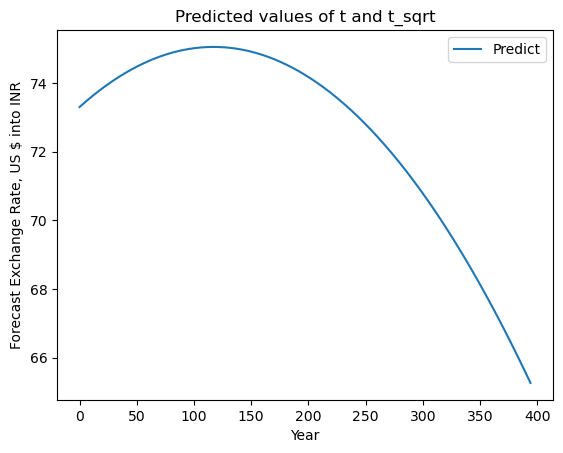

In [44]:
quad_final_prdct.plot()
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.xlabel('Year')
plt.title('Predicted values of t and t_sqrt')
plt.legend(['Predict'])
plt.show();

In [40]:
forecast.yhat[364:]

364    73.716127
365    74.020926
366    74.024335
367    73.745912
368    73.691318
369    73.703246
370    73.696846
371    73.739991
372    74.044790
373    74.048199
374    73.769776
375    73.715182
376    73.727110
377    73.720710
378    73.763854
379    74.068654
380    74.072063
381    73.793640
382    73.739045
383    73.750973
384    73.744574
385    73.787718
386    74.092517
387    74.095926
388    73.817503
389    73.762909
390    73.774837
391    73.768438
392    73.811582
393    74.116381
394    74.119790
Name: yhat, dtype: float64

In [41]:
forecast.yhat.head()

0    70.678959
1    70.700681
2    70.788927
3    70.858844
4    70.978305
Name: yhat, dtype: float64